<h1>Estructura de bandas electrónicas para una red 2D cuadrada en la aproximación de electrón libre</h1>
<img src="https://docs.google.com/drawings/d/e/2PACX-1vTxVRoEM8tLAiyslhA1dPrxsBwLx_aHQiNcgz_D33FHRPI7TWyx1qtqPZOIBnBUtmgX87_TDm8USbpL/pub?w=916&amp;h=298">

<h2>Definición de los puntos estrella</h2>

In [11]:
import numpy as np
import matplotlib.pyplot as plt

a = 1

pi = np.pi
b  = 2*pi/a

b1 = np.r_[b, 0]
b2 = np.r_[0, b]

k_Gamma = np.r_[0  , 0  ]
k_Delta = np.r_[b/4, 0  ]
k_X     = np.r_[b/2, 0  ] 
k_Z     = np.r_[b/2, b/4]
k_M     = np.r_[b/2, b/2]
k_Sigma = np.r_[b/4, b/4]

<h2>Valores de $\vec{k}$ y cálculo de la energía</h2>
<img src="https://docs.google.com/drawings/d/e/2PACX-1vRe7-PmBsPN4YbDxXhnIgKqEHna5_V_d8I4iDnZ384D9UC1cKUOIHvgkKcRW-nuv3SNaGFyJHP-aJ9V/pub?w=920&amp;h=347">
<br><br>
Se define la red recíproca $\vec{G}$, para todos los enteros $m_1$ y $m_2$, tales que dados los vectores primitivos de la red recíproca $\vec{b}_1$ y $\vec{b}_2$, $$\vec{G} = m_1 \vec{b}_1 + m_2 \vec{b}_2 $$

Nótese que la energía $E_{\vec{k}}$ es invariante ante cualquier transformación de traslación dada por $\vec{G}$.

In [12]:
from scipy import constants as cte

hbar = cte.hbar/cte.e # eV s
m_e  = cte.m_e

def energy(k1, k2, m1 = 0, m2 = 0, number_of_k_points = 1000):
    k_12 = k2 - k1
    norm_k_12 = np.linalg.norm(k_12)
    uk_12 = k_12 / norm_k_12
    X = np.linspace(0, norm_k_12, number_of_k_points)
    K = [ k1 + x*uk_12 + m1*b1 + m2*b2  for x in X ]
    E = [ hbar**2 * np.dot(k,k) / (2*m_e) for k in K]
    return X, np.array(E)


Text(0, 0.5, '$E_{\\vec{k}}$ [eV]')

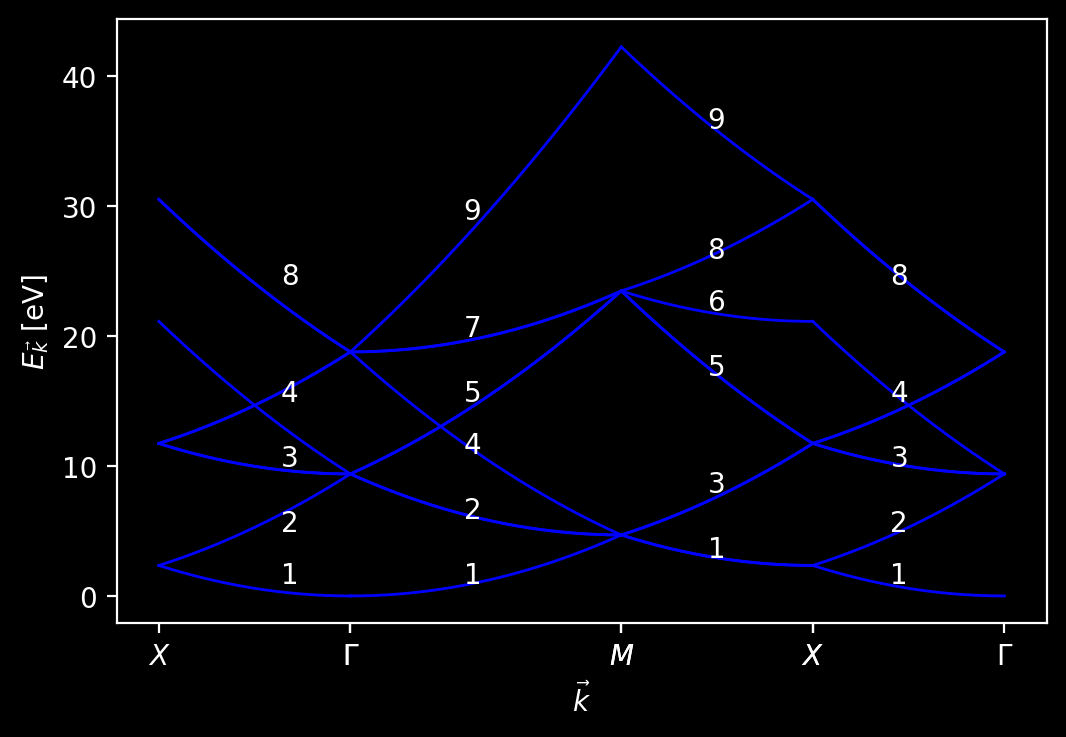

In [20]:
k_path = [k_X, k_Gamma, k_M, k_X, k_Gamma]
k_labels = [r'$X$', r'$\Gamma$', r'$M$', r'$X$', r'$\Gamma$']

plt.figure(dpi = 200)
BZ = { # valores de m1 y m2 para la BZ -> (m1, m2)
    1: ( 0,  0),
    2: (-1,  0),
    3: ( 0, -1),
    4: (-1, -1),
    5: ( 0,  1),
    6: ( 1,  0),
    7: (-1,  1),
    8: ( 1, -1),
    9: ( 1,  1)}

z_index = []
for zone in range(1, 10):
    m1 = BZ[zone][0]
    m2 = BZ[zone][1]
    Dk = 0
    locs   = []
    xticks = []
    for i in range(len(k_path)-1):
        k, E = energy(k_path[i], k_path[i+1], m1 = m1, m2 = m2)
        k += Dk
        plt.plot(k, E, 'b', lw = 1)
        Dk = k.max()
        if i < len(k_labels):
            locs.append(k.min())
            locs.append(k.max())
            xticks.append(k_labels[i])
            xticks.append(k_labels[i+1])
        zi = (np.round(k.mean()), np.round(E[np.int16(E.size/2)]))
        if not zi in z_index:
            z_index.append(zi)
            plt.text(zi[0], zi[1], zone)
    plt.xticks(ticks=locs, labels=xticks)

plt.xlabel(r'$\vec{k}$')
plt.ylabel(r'$E_{\vec{k}}$ [eV]')

End! By the moment.